In [84]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np 
from scipy import interp
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve,auc
import statistics
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("cleve.mod", sep = "\s+", header=None)
df.columns = ["age", "sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","class","target"]

#Removing empty values
df.isna().sum()

#Labelling all the colums in the dataset
l1 = LabelEncoder()
df = df.apply(l1.fit_transform)

#Removing outliers using Inter Quartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]





In [87]:
x = df.loc[:, df.columns != 'target']
y = df.iloc[:,-1:] 

cv = StratifiedKFold(n_splits=10,shuffle=True)

#Using Adaboost classifier as Ensemble method for classification
clf = AdaBoostClassifier(n_estimators=50,learning_rate=1)
for train,test in cv.split(x,y):
    
    model = clf.fit(x.iloc[train],y.iloc[train])
    y_pred = model.predict(x.iloc[test])

    aucs.append(metrics.accuracy_score(y.iloc[test], y_pred))
    fsc.append(metrics.f1_score(y.iloc[test], y_pred, average='weighted'))
    
print("Final Accuracy: ",statistics.mean(aucs)*100)
print("Final F1 score: ",statistics.mean(fsc)*100) 





Final Accuracy:  68.16228070175438
Final F1 score:  66.85492881874461


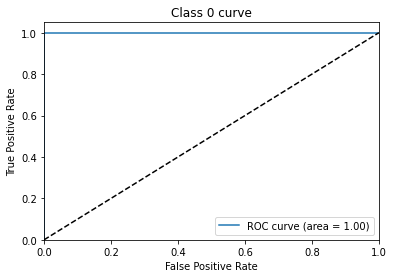

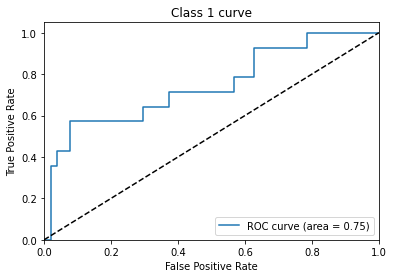

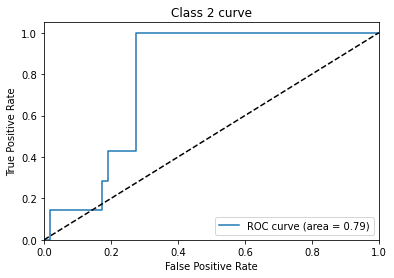

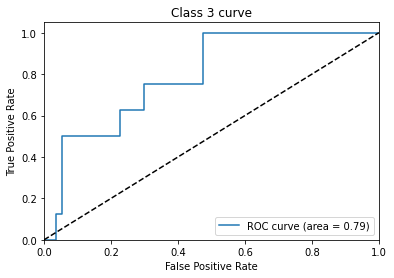

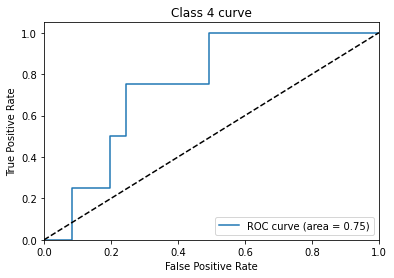

In [86]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

n_classes = 5
y = label_binarize(y, classes=[0,1,2,3,4])

# shuffle and split training and test sets
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(x_train, y_train).decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
th=dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], th = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    title = "Class " + str(i) + " curve"
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

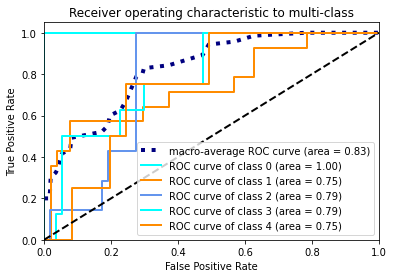

In [92]:
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
lw=2
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()